In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv(r"C:\Users\ss747\Personal Projects\archive\Student Mental Health.csv")

In [36]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [37]:
df = df.drop('Timestamp',1)

In [38]:
df = df.rename(columns={'What is your course?':'Course of Study', 'What is your CGPA?':'CGPA', 'Choose your gender':'Gender', 'Your current year of Study':'Year of Study', 'Do you have Depression?':'Depression', 'Do you have Anxiety?':'Anxiety', 'Do you have Panic attack?':'Panic Attack','Did you seek any specialist for a treatment?':'Treatment from Specialist'})

In [39]:
df.head()

,Gender,Age,Course of Study,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment from Specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


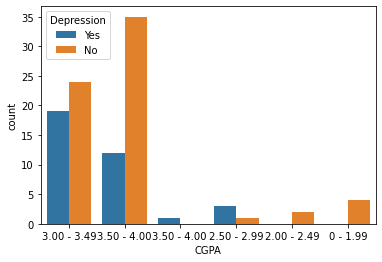

In [40]:
#Checking co-relation between CGPA and Depression#
X=df['CGPA']
Y=df['Depression']
sns.countplot(data = df, x = X, hue = Y)
plt.show()

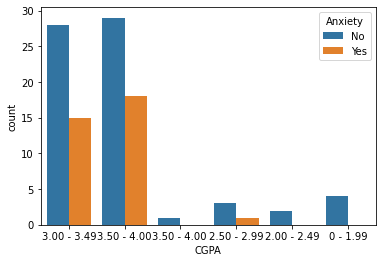

In [41]:
#Checking co-relation between CGPA and Anxiety#
X=df['CGPA']
Y=df['Anxiety']
sns.countplot(data = df, x = X, hue = Y)
plt.show()

In [42]:
df.replace(['Yes','No'],[1,0], inplace=True)
df.replace(['Male','Female'],[0,1], inplace=True)
df.replace({'Year of Study':{'year 1': 1, 'Year 1': 1, 'year 2': 2, 'Year 2': 2, 'year 3': 3, 'Year 3': 3,
                                          'year 4': 4, 'Year 4': 4}}, inplace = True)

In [43]:
df.head()

,Gender,Age,Course of Study,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment from Specialist
0,1,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,0,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,0,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,1,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,0,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [44]:
#Number of males with anxiety#
male_anxiety=0
for i in range(0,len(df)):
    if(df.Gender[i]==0):
        if(df.Anxiety[i]==1):
            male_anxiety=male_anxiety+1
anxiety_per_male=(male_anxiety/df.shape[0])*100
anxiety_per_male

9.900990099009901

In [45]:
#Number of females with anxiety#
female_anxiety=0
for i in range(0,len(df)):
    if(df.Gender[i]==1):
        if(df.Anxiety[i]==1):
            female_anxiety=female_anxiety+1
anxiety_per_female=(female_anxiety/df.shape[0])*100
anxiety_per_female

23.762376237623762